In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
name=["vm","mae_max","rmse_max","mae_avg","rmse_avg","mae_min","rmse_min"]
ali1 = pd.read_csv('./src/holt_winter/ali/ewma_forecast_vm_d1.csv',names=name)
ali2 = pd.read_csv('./src/holt_winter/ali/ewma_forecast_vm_d2.csv',names=name)
ali3 = pd.read_csv('./src/holt_winter/ali/ewma_forecast_vm_d3.csv',names=name)
ali4 = pd.read_csv('./src/holt_winter/ali/ewma_forecast_vm_d4.csv',names=name)
ali_all = pd.concat([ali1,ali2,ali3,ali4])
ali_all

,vm,mae_max,rmse_max,mae_avg,rmse_avg,mae_min,rmse_min
0,0007b9886b07d366f7848cdd79fb245c,0.062717,0.260419,0.109972,0.170400,0.097804,0.218258
0,000e0f1252ab4fb0fbc3a101a1456468,0.284106,0.391083,0.069513,0.110163,0.000000,0.000000
0,0011042741e6f670f02914c947b46b9c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0013252beb4a247ba2f933a0b4543fcb,2.246553,2.994469,1.259646,1.662487,1.207199,1.621952
0,0087dc9ff2c9219f01c0b627871ddb95,0.828768,1.168866,0.577282,0.823712,0.854084,1.218124
0,00ec0f8381a05c81d134f9eefff52db7,2.414013,3.105964,1.766141,2.343481,1.774751,2.390438
0,00ed3966bcf32bf3c2dd01f93f14f603,1.639578,2.709021,0.941073,1.566256,0.779254,1.356502
0,00edbbbdc869e421f1824fe9b5261fb7,1.932067,2.563544,1.605052,2.109955,1.543340,2.037940
0,00f0a7dba20068f1f10284e80c62301e,0.098810,0.240296,0.105006,0.180166,0.116944,0.235507
0,01051ef629776bed6d0352dbda79db67,2.805348,4.206696,1.063658,1.615636,0.898927,1.395045


In [4]:
v1=pd.read_csv('./src/holt_winter/azure/18forecast_vm_d1.csv',names=name)
v2=pd.read_csv('./src/holt_winter/azure/18forecast_vm_d2.csv',names=name)
v3=pd.read_csv('./src/holt_winter/azure/18forecast_vm_d3.csv',names=name)
v4=pd.read_csv('./src/holt_winter/azure/18forecast_vm_d4.csv',names=name)
v5=pd.read_csv('./src/holt_winter/azure/18forecast_vm_d5.csv',names=name)
v6=pd.read_csv('./src/holt_winter/azure/18forecast_vm_d6.csv',names=name)
v7=pd.read_csv('./src/holt_winter/azure/18forecast_vm_d7.csv',names=name)
v8=pd.read_csv('./src/holt_winter/azure/18forecast_vm_d8.csv',names=name)
azure = pd.concat([v1,v2,v3,v4,v5,v6,v7,v8])
azure

,vm,mae_max,rmse_max,mae_avg,rmse_avg,mae_min,rmse_min
0,+H4ZyijjXr2RW80PINxFwf9IdHfcz07r7q+G4DBEw+S/No...,4.375058,5.763782,0.341492,0.572942,0.171543,0.242827
0,+HqwLSMR7sJ4Zt0AG14nzPL2An1f7YvWG9fQbLjiWzqb8H...,2.224046,4.137225,0.083027,0.268895,0.017129,0.023157
0,+IXiKLW1j9bnQX6eCpgUBfYPq3/j3lJbRK4GrGkDVDO66p...,1.374411,1.839382,0.417975,0.689375,0.481165,0.727376
0,+IjaDjaRruRa6ACbfsAhOcBtPTeuKN8XrFcNXMtslzjBlP...,5.034190,6.790359,0.744504,0.984520,0.213450,0.280540
0,+JAJNqERJ6Ortvk9lvWuqzRj16lLDP2vJ6Di5fn/EGVCpN...,1.247936,3.693565,0.138517,0.488160,0.093117,0.126527
0,+JI3DKE5ZFyE70m3Rb0uSX8porqmtu4oPTyzCRr43CWZwM...,11.191769,16.799069,2.120299,3.889026,0.786891,1.649573
0,+JSjm1Xg1kRLEnJYj+Kp8KoXBNXARQY5NxiIAI1/ScioXG...,2.563963,5.024902,0.127825,0.289697,0.041448,0.053196
0,+KVZBN7RsSkxyH5y8FFO0Ff7K7vJeK5dciePfY6O+PC2jL...,2.402671,3.625293,0.162319,0.238901,0.052349,0.068667
0,+Kme2yjGeXUvEVopMMpj+1gtsxrNdZ//z37gZJydYqZunp...,14.228063,20.615196,0.768079,1.736694,0.101059,0.128105
0,+LELPBuOqS8isNsFEcF/O/HyK2WvhzJIq2UrL2Vc3ZaXby...,6.215860,12.065409,0.699814,1.601288,0.153791,0.201359


In [5]:
ali_rmse_max=ali_all[ali_all['rmse_max']<=100]
azure_rmse_max=azure[azure['rmse_max']<=100]

In [6]:
ali_rmse_max['rmse_max'].mean()

2.385792168686257

In [7]:
azure_rmse_max['rmse_max'].mean()

8.513736369421409

In [8]:
lstm_ali_max=pd.read_csv('./lstm_ali_max.csv',names=["vm","mae_max","rmse_max"])
lstm_ali_max.head()

,vm,mae_max,rmse_max
0,00060b8a63afed0d4a8e4066b273e7fb,0.025048,0.118862
0,0007b9886b07d366f7848cdd79fb245c,0.072188,0.390839
0,000b27c61e7ed1954fa9907918dc7c18,0.796146,1.579764
0,000e0f1252ab4fb0fbc3a101a1456468,0.387251,0.448486
0,0011042741e6f670f02914c947b46b9c,0.000000,0.000000


In [9]:
lstm_ali_avg=pd.read_csv('./lstm_ali_avg.csv',names=["vm","mae_avg","rmse_avg"])

In [10]:
lstm_azure_avg=pd.read_csv('./lstm_azure_avg.csv',names=["vm","mae_avg","rmse_avg"])
lstm_azure_max=pd.read_csv('./lstm_azure_max.csv',names=["vm","mae_max","rmse_max"])

In [11]:
def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

In [12]:
ann_azure_max=pd.read_csv('./ann_azure_max.csv',names=["vm","mape_max","rmse_max"])
ann_azure_rmse_max=ann_azure_max[ann_azure_max['rmse_max']<=100]
#ann_azure_avg=pd.read_csv('./ann_azure_avg.csv',names=["vm","mape_avg","rmse_avg"])

In [13]:
lstm2_azure_max=pd.read_csv('./lstm2_azure_max.csv',names=["vm","mape_max","rmse_max"])
lstm2_azure_rmse_max=lstm2_azure_max[lstm2_azure_max['rmse_max']<=100]

In [14]:
lstm2_ali_max=pd.read_csv('./lstm2_ali_max.csv',names=["vm","mape_max","rmse_max"])
lstm2_ali_rmse_max=lstm2_ali_max[lstm2_ali_max['rmse_max']<=100]

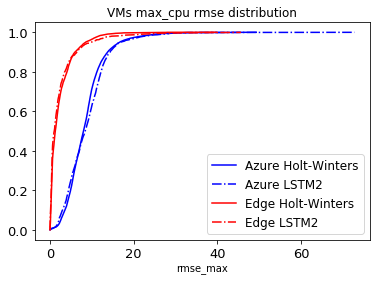

In [15]:
ali_rmse_max=ali_all[ali_all['rmse_max']<=100]
lstm_ali_rmse_max=lstm_ali_max[lstm_ali_max['rmse_max']<=100]
lstm_azure_rmse_max=lstm_azure_max[lstm_azure_max['rmse_max']<=100]


cdf(azure['rmse_max'],label='Azure Holt-Winters',color='b',ls='-')
#cdf(lstm_azure_rmse_max['rmse_max'],label='Azure LSTM',color='g',ls='-')
cdf(lstm2_azure_rmse_max['rmse_max'],label='Azure LSTM2',color='b',ls='-.')
cdf(ali_rmse_max['rmse_max'],label='Edge Holt-Winters',color='r',ls='-')
cdf(lstm2_ali_rmse_max['rmse_max'],label='Edge LSTM2',color='r',ls='-.')
#cdf(lstm_ali_rmse_max['rmse_max'],label='Edge LSTM',color='r',ls='-.')
#cdf(ann_azure_rmse_max['rmse_max'],label='Azure ANN',color='y',ls='-')
plt.title('VMs max_cpu rmse distribution')
plt.legend(fontsize='large')
plt.xlabel('rmse_max')
plt.tick_params(labelsize = 13)

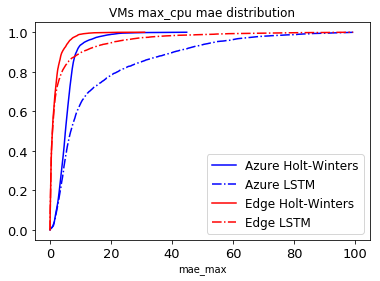

In [14]:
ali_mae_max=ali_all[ali_all['mae_max']<=100]
lstm_ali_mae_max=lstm_ali_max[lstm_ali_max['mae_max']<=100]
lstm_azure_mae_max=lstm_azure_max[lstm_azure_max['mae_max']<=100]

cdf(azure['mae_max'],label='Azure Holt-Winters',color='b',ls='-')
cdf(lstm_azure_mae_max['mae_max'],label='Azure LSTM',color='b',ls='-.')
cdf(ali_mae_max['mae_max'],label='Edge Holt-Winters',color='r',ls='-')
cdf(lstm_ali_mae_max['mae_max'],label='Edge LSTM',color='r',ls='-.')

plt.title('VMs max_cpu mae distribution')
plt.legend(fontsize='large')
plt.xlabel('mae_max')
plt.tick_params(labelsize = 13)

In [16]:
ann_azure_avg=pd.read_csv('./ann_azure_avg.csv',names=["vm","mape_avg","rmse_avg"])
ann_azure_rmse_avg=ann_azure_avg[ann_azure_avg['rmse_avg']<=100]

In [17]:
lstm2_azure_avg=pd.read_csv('./lstm2_azure_avg.csv',names=["vm","mape_avg","rmse_avg"])
lstm2_azure_rmse_avg=lstm2_azure_avg[lstm2_azure_avg['rmse_avg']<=100]

In [18]:
lstm2_ali_avg=pd.read_csv('./lstm2_ali_avg.csv',names=["vm","mape_avg","rmse_avg"])
lstm2_ali_rmse_avg=lstm2_ali_avg[lstm2_ali_avg['rmse_avg']<=100]

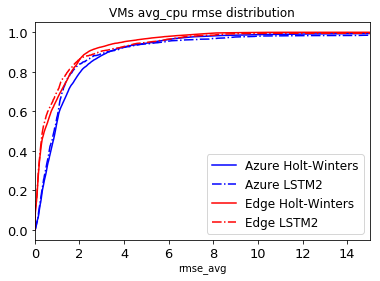

In [19]:
azure_rmse_avg=azure[azure['rmse_avg']<=100]
ali_rmse_avg=ali_all[ali_all['rmse_avg']<=100]
lstm_ali_rmse_avg=lstm_ali_avg[lstm_ali_avg['rmse_avg']<=100]
lstm_azure_rmse_avg=lstm_azure_avg[lstm_azure_avg['rmse_avg']<=100]


cdf(azure_rmse_avg['rmse_avg'],label='Azure Holt-Winters',color='b',ls='-')
#cdf(lstm_azure_rmse_avg['rmse_avg'],label='Azure LSTM',color='g',ls='-')
cdf(lstm2_azure_rmse_avg['rmse_avg'],label='Azure LSTM2',color='b',ls='-.')
cdf(ali_rmse_avg['rmse_avg'],label='Edge Holt-Winters',color='r',ls='-')
#cdf(lstm_ali_rmse_avg['rmse_avg'],label='Edge LSTM',color='r',ls='-.')
cdf(lstm2_ali_rmse_avg['rmse_avg'],label='Edge LSTM2',color='r',ls='-.')
#cdf(ann_azure_rmse_avg['rmse_avg'],label='Azure ANN',color='y',ls='-')

plt.title('VMs avg_cpu rmse distribution')
plt.legend(fontsize='large')
plt.xlabel('rmse_avg')
plt.xlim(0,15)
plt.tick_params(labelsize = 13)

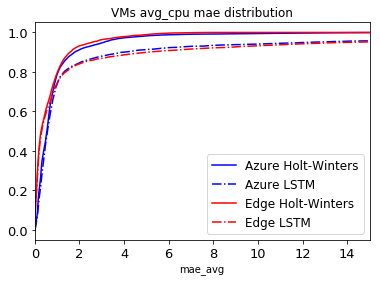

In [16]:
azure_mae_avg=azure[azure['mae_avg']<=100]
ali_mae_avg=ali_all[ali_all['mae_avg']<=100]
lstm_ali_mae_avg=lstm_ali_avg[lstm_ali_avg['mae_avg']<=100]
lstm_azure_mae_avg=lstm_azure_avg[lstm_azure_avg['mae_avg']<=100]

cdf(azure_mae_avg['mae_avg'],label='Azure Holt-Winters',color='b',ls='-')
cdf(lstm_azure_mae_avg['mae_avg'],label='Azure LSTM',color='b',ls='-.')
cdf(ali_mae_avg['mae_avg'],label='Edge Holt-Winters',color='r',ls='-')
cdf(lstm_ali_mae_avg['mae_avg'],label='Edge LSTM',color='r',ls='-.')

plt.title('VMs avg_cpu mae distribution')
plt.legend(fontsize='large')
plt.xlabel('mae_avg')
plt.xlim(0,15)
plt.tick_params(labelsize = 13)